## Project 4-1: Plot the ramen data with Seaborn The data file
   ramen-ratings.csv
## Tasks
1. Read the data from the CSV file into a DataFrame and display the first five rows.
2. Create a bar plot to show the Stars by Style with a Seaborn specific method.
3. Create a bar plot to show the Stars by Style with a Seaborn generic method.
4. Modify the plot you just created to use a custom title and x-axis label.
5. Use the query() method to filter the data to contain only data for Japan, India, Taiwan, and the U.S. Plot the stars by style for each country on a subplot with two subplots per row.
6. Modify the plot you just created to have a custom title for each subplot. Hint: Use the enumerate() method.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('ramen-ratings.csv')
df.head()

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75


[Text(0.5, 1.0, 'stars by style'),
 Text(0, 0.5, 'style'),
 Text(0.5, 0, 'stars')]

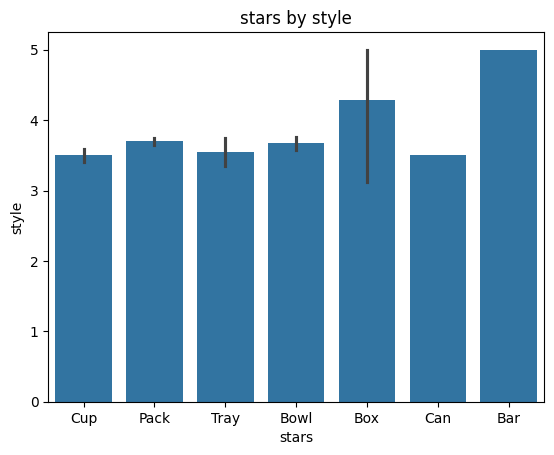

In [3]:
# Q2: Create a bar plot to show the Stars by Style with a Seaborn specific method.

g=sns.barplot(x='Style', y='Stars', data=df)
g.set(title='stars by style', ylabel='style',xlabel='stars')

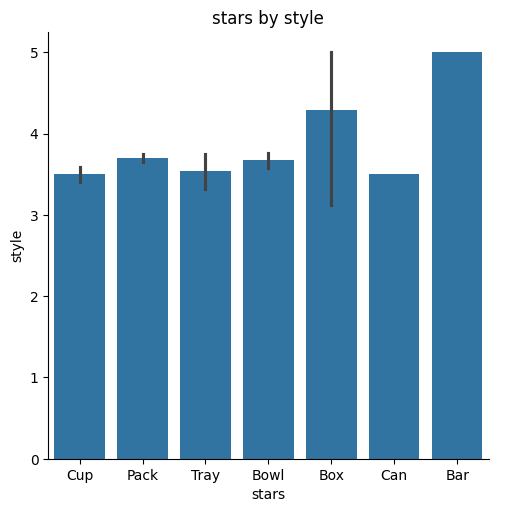

In [4]:
#Q3:Create a bar plot to show the Stars by Style with a Seaborn generic method.
g=sns.catplot(x='Style',y='Stars',data=df,kind='bar')
g.set(title='stars by style', ylabel='style',xlabel='stars')

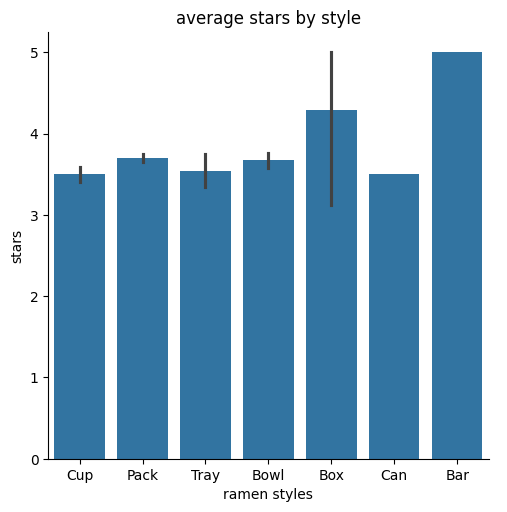

In [5]:
#Q4:Modify the plot you just created to use a custom title and x-axis label.
g=sns.catplot(x='Style',y='Stars',data=df,kind='bar')
g.set(title='average stars by style', ylabel='stars',xlabel='ramen styles')

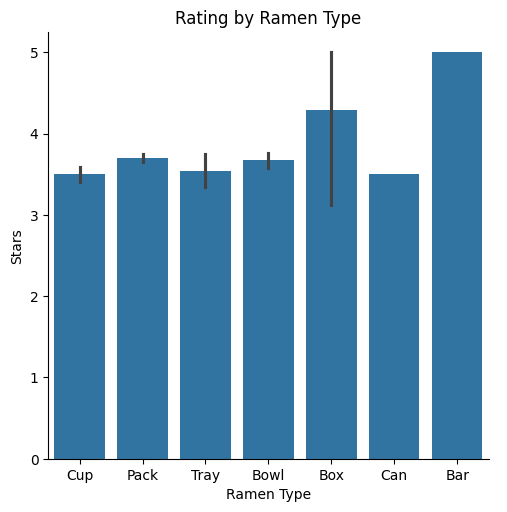

In [6]:
# another way for loop way
g = sns.catplot(data=df, x='Style', y='Stars', kind='bar')
for ax in g.axes.flat:
    ax.set(title='Rating by Ramen Type', xlabel='Ramen Type')

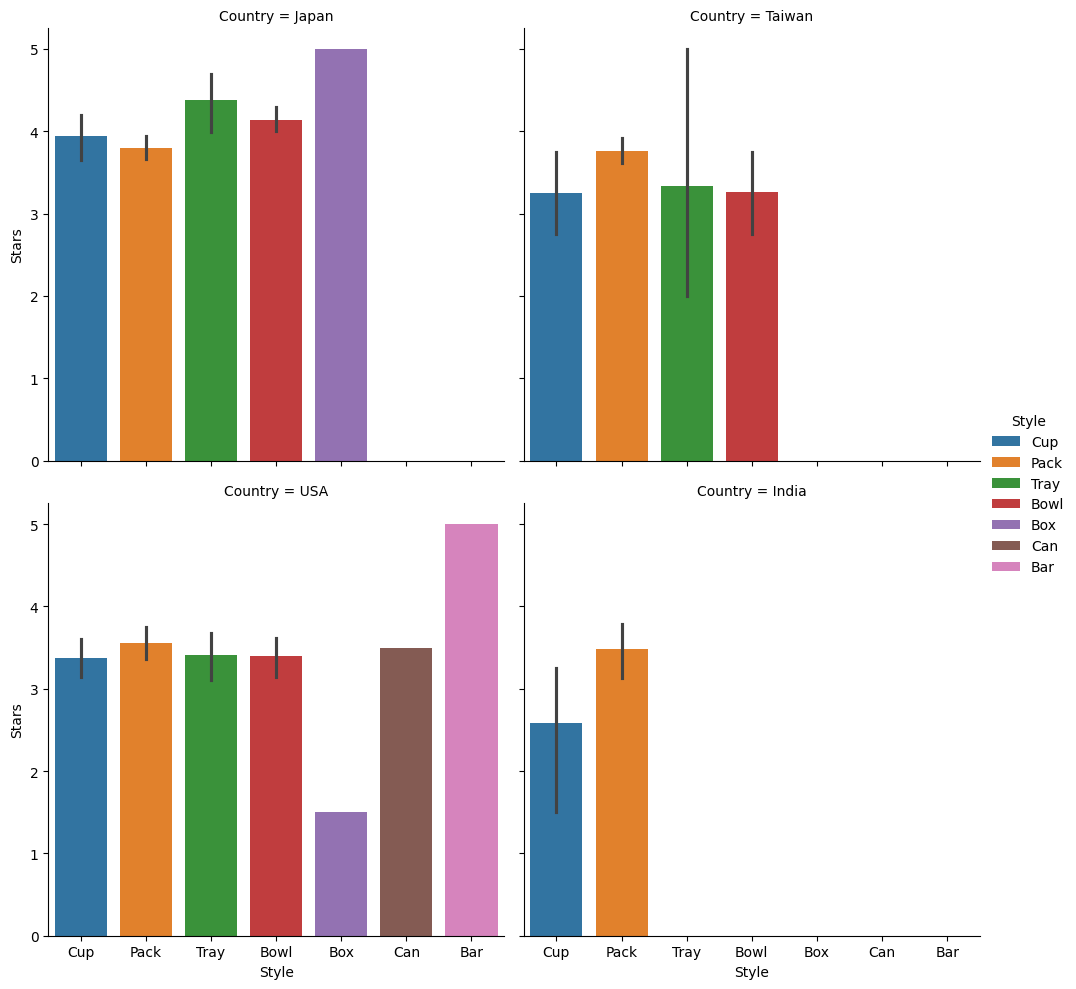

In [7]:
#Q5:Use the query() method to filter the data to contain only data for Japan, India, Taiwan, and the U.S. 
#   Plot the stars by style for each country on a subplot with two subplots per row.
sns.catplot(data=df.query("Country in ['Japan','India','Taiwan','USA']"),
            kind='bar',
            x='Style',
            y='Stars',
            hue='Style',
            col='Country',
            col_wrap=2)

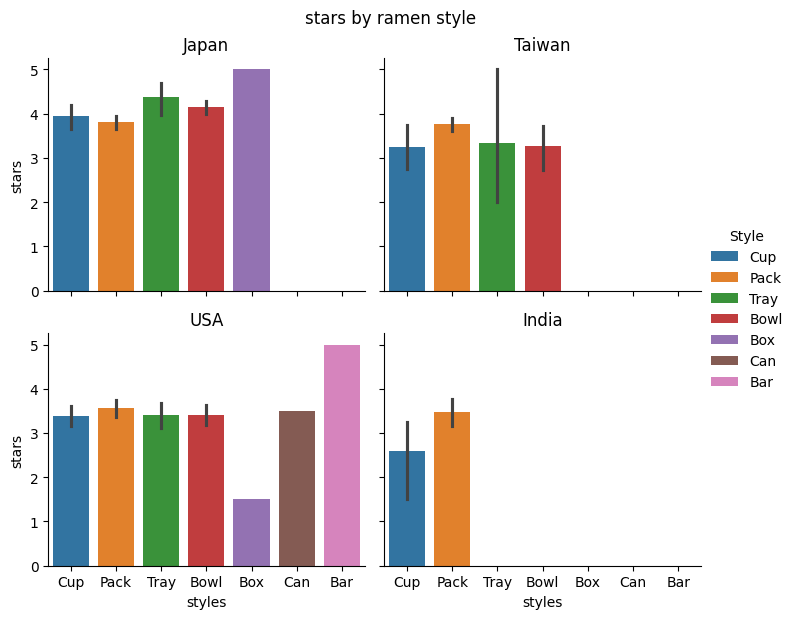

In [11]:
#Q6:Modify the plot you just created to have a custom title for each subplot. 
# Hint: Use the enumerate() method.
g = sns.catplot(
    data=df.query("Country in ['Japan','India','Taiwan','USA']"), 
    kind='bar', x='Style', y='Stars', hue='Style',
    col='Country', col_wrap=2, height=3, aspect=1.2)
g.fig.suptitle('stars by ramen style', y=1.025)
#ramen_style = df['Country'].drop_duplicates().tolist()
ramen_style=df['Country'].unique()
for index, ax in enumerate(g.axes.flat):
    ax.set_title(ramen_style[index])
    ax.set_ylabel('stars')
    ax.set_xlabel('styles')
   


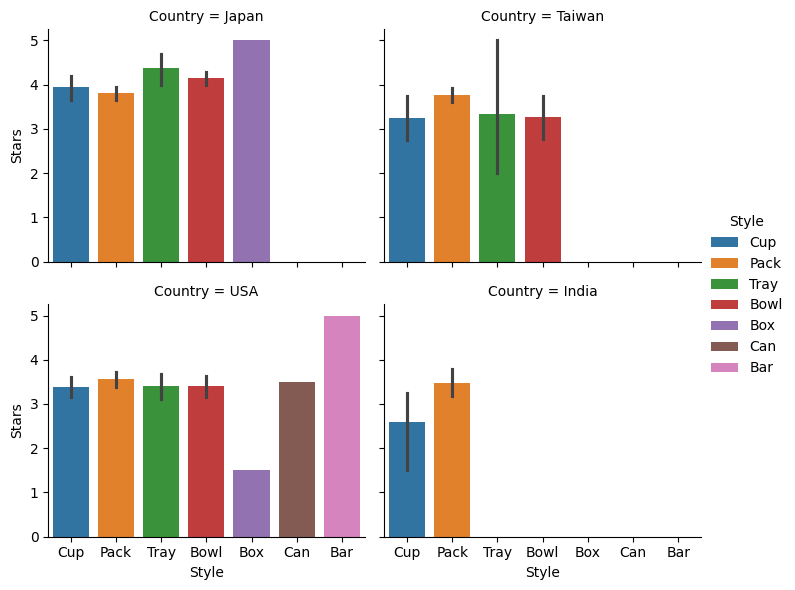

In [9]:
## another way 

g = sns.catplot(
    data=df.query("Country in ['Japan','India','Taiwan','USA']"), 
    kind='bar', x='Style', y='Stars', hue='Style',
    col='Country', col_wrap=2, height=3, aspect=1.2)

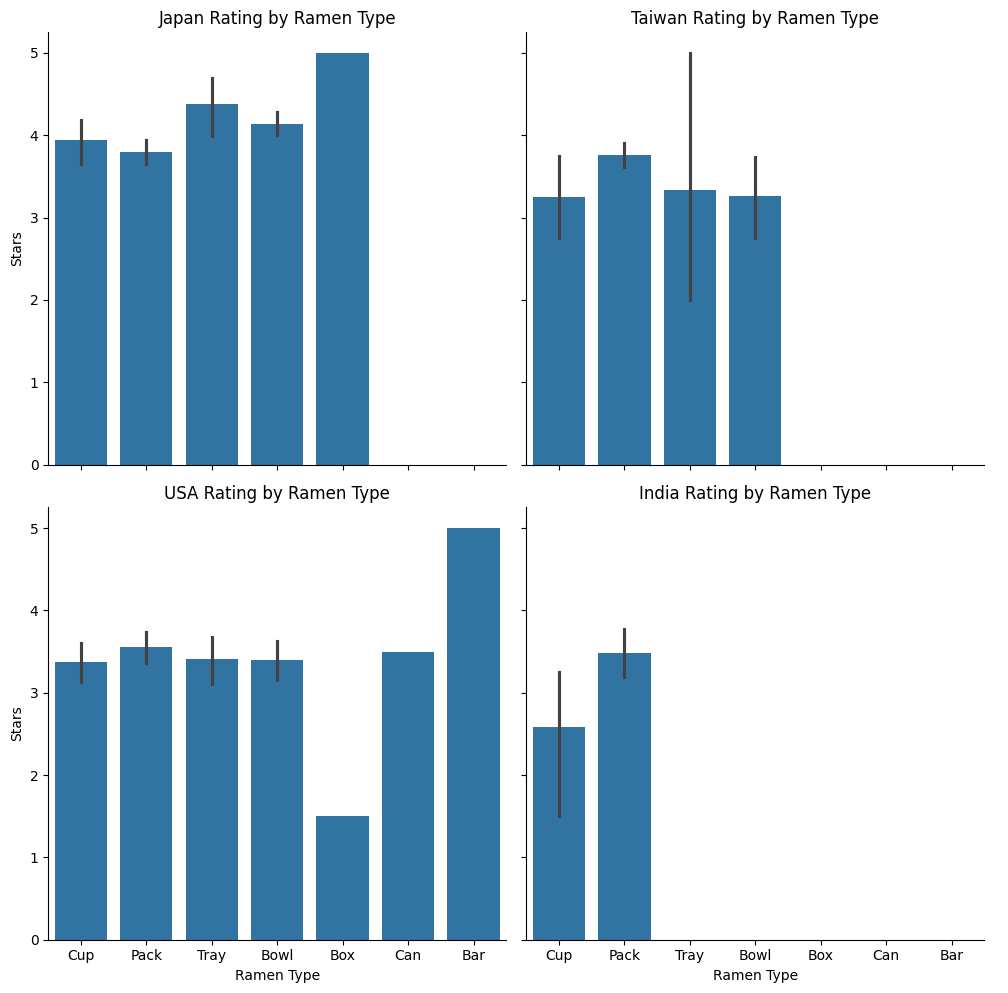

In [14]:
# another way by using enumerate
g = sns.catplot(data=df.query('Country in ["Japan","India","Taiwan","USA"]'), 
                x='Style', y='Stars', kind='bar', col='Country', col_wrap=2)
countries = df.query('Country in ["Japan","India","Taiwan","USA"]').Country.unique()
for i, ax in enumerate(g.axes.flat):
    ax.set(title=countries[i] + ' Rating by Ramen Type', xlabel='Ramen Type')